# Regression with an Insurance Dataset

### Necessary imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Import train data
df = pd.read_csv('/content/train.csv')

## I - EDA (Exploratory Data Analysis)

#### 1- Shape analysis

In [7]:
# Number of rows and columns
df1 = df.copy()
df1.shape

(45746, 21)

In [34]:
pd.set_option('display.max_column',21)
df1.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [9]:
df1.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [10]:
df1.dtypes.value_counts()

,count
object,11
float64,9
int64,1


In [11]:
# delete col:id
df1.drop(columns='id',inplace=True)

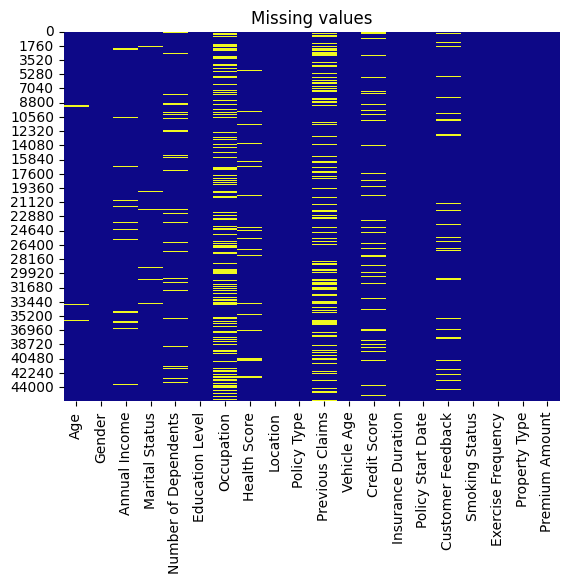

In [12]:
plt.figure()
plt.title('Missing values')
sns.heatmap(data=df1.isna(),cbar=False,cmap='plasma')
plt.show()

In [13]:
missing_rate = (df1.isna().sum(axis=0)/df1.shape[0]).sort_values(ascending=True)
missing_rate_percentage = (missing_rate * 100).round(2).astype(str) + '%'
missing_rate_percentage

,0
Policy Type,0.0%
Exercise Frequency,0.0%
Smoking Status,0.0%
Policy Start Date,0.0%
Insurance Duration,0.0%
Property Type,0.0%
Location,0.0%
Premium Amount,0.0%
Education Level,0.0%
Gender,0.0%


#### 2 - Background analysis

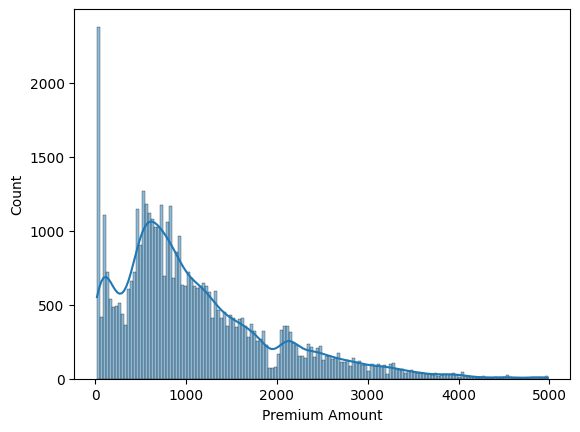

In [14]:
# Target visualisation
plt.figure()
sns.histplot(data=df1,x='Premium Amount',kde=True,bins=150)
plt.show()

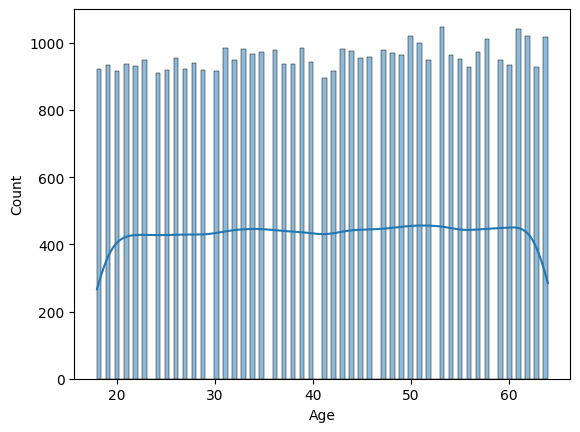

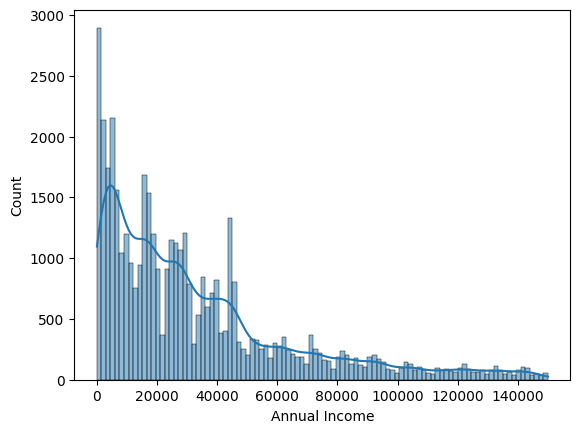

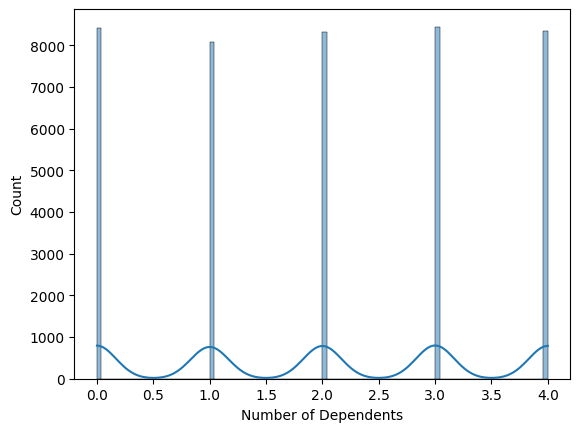

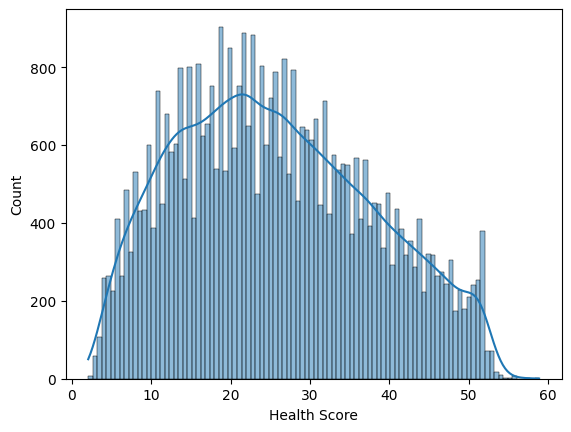

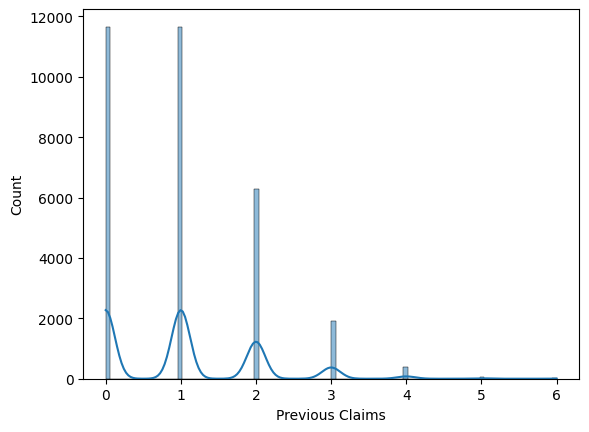

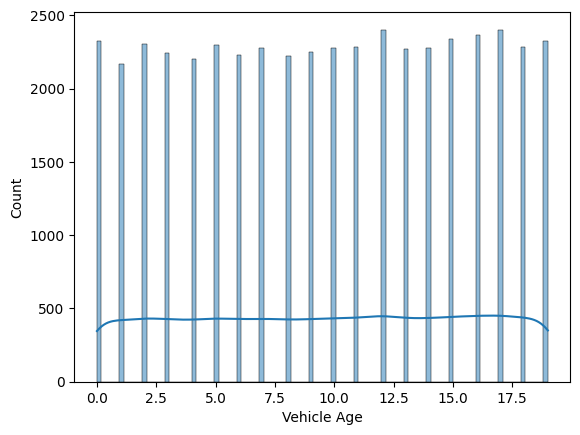

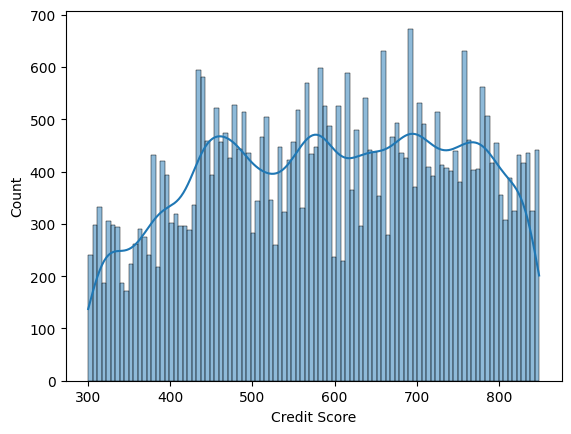

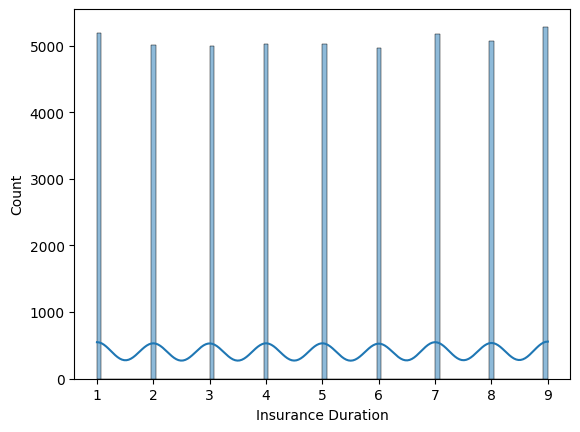

In [15]:
# Quantitative variables
df1_numerical = df1.select_dtypes(include='float64')
for col in df1_numerical.iloc[:,:-1]:
    plt.figure()
    sns.histplot(data=df1_numerical,x=col,kde=True,bins=100)
    plt.show()

In [16]:
# Qualitative variables
df1_categorical = df1.select_dtypes(include='object')
df1_categorical
for col in df1_categorical:
    print(f"{col :-<50} {df1_categorical[col].unique()}")

Gender-------------------------------------------- ['Female' 'Male']
Marital Status------------------------------------ ['Married' 'Divorced' 'Single' nan]
Education Level----------------------------------- ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation---------------------------------------- ['Self-Employed' nan 'Employed' 'Unemployed']
Location------------------------------------------ ['Urban' 'Rural' 'Suburban']
Policy Type--------------------------------------- ['Premium' 'Comprehensive' 'Basic']
Policy Start Date--------------------------------- ['2023-12-23 15:21:39.134960' '2023-06-12 15:21:39.111551'
 '2023-09-30 15:21:39.221386' ... '2019-11-10 15:21:39.080440'
 '2024-05-11 15:21:39.282785' '2022-09-16 15:21:39.102694']
Customer Feedback--------------------------------- ['Poor' 'Average' 'Good' nan]
Smoking Status------------------------------------ ['No' 'Yes']
Exercise Frequency-------------------------------- ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type---

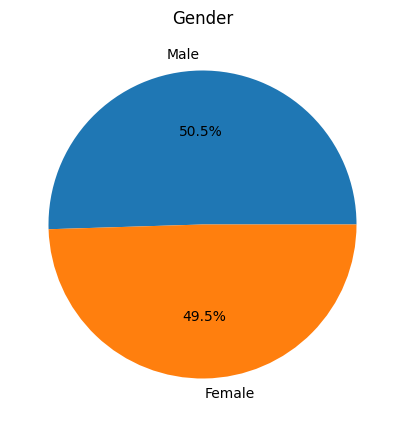

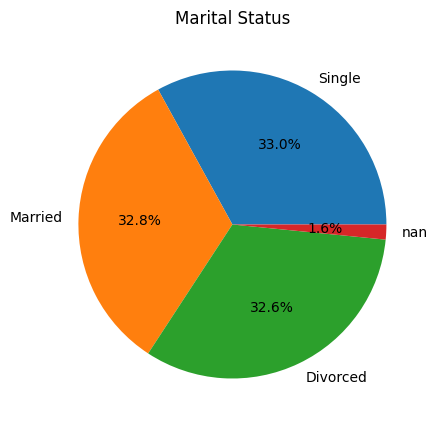

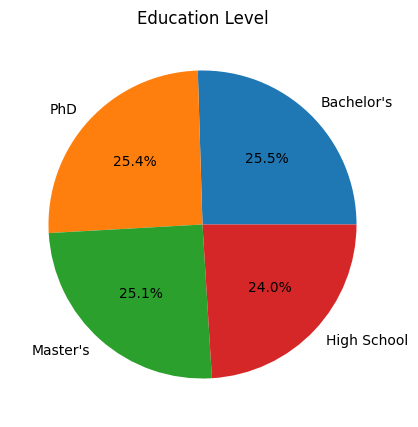

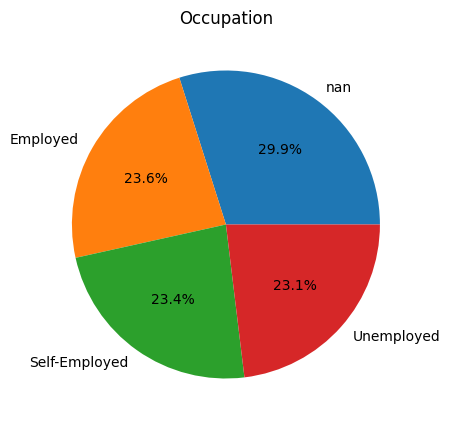

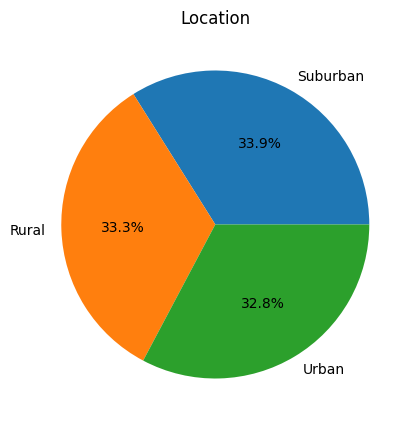

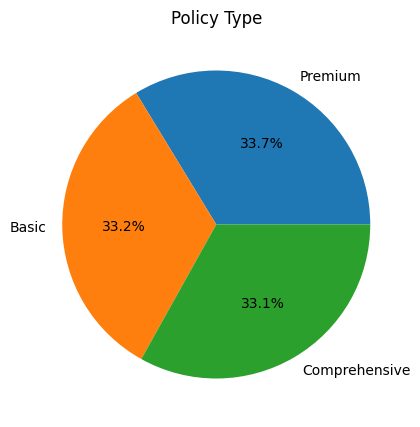

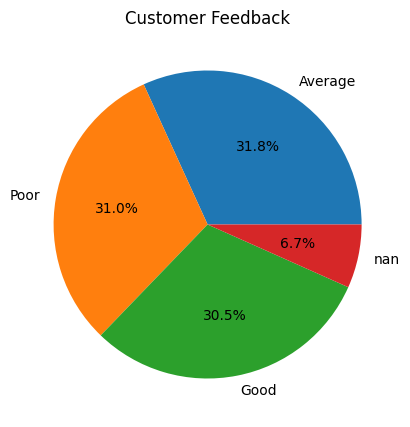

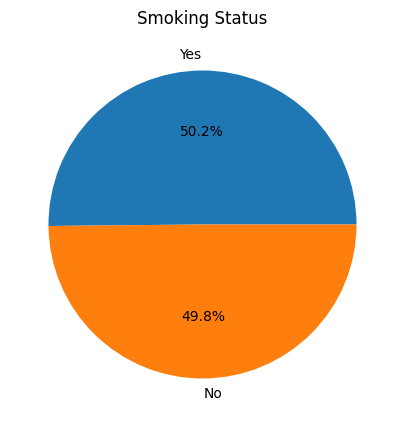

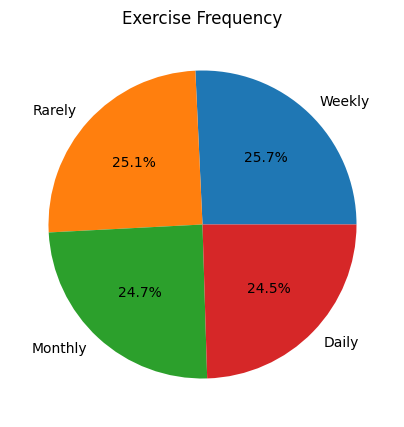

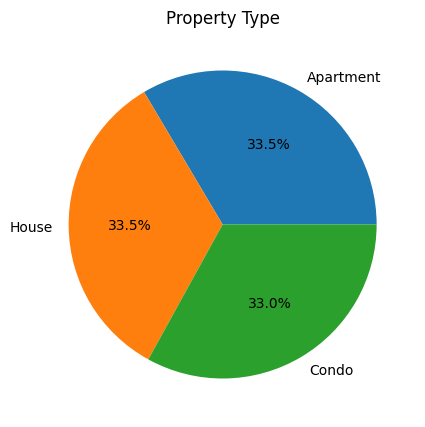

In [17]:
for col in df1_categorical.drop(columns='Policy Start Date'):
    plt.figure(figsize=(5,5))
    plt.title(col)
    df1_categorical[col].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',startangle=0)
    plt.ylabel('')
    plt.show()

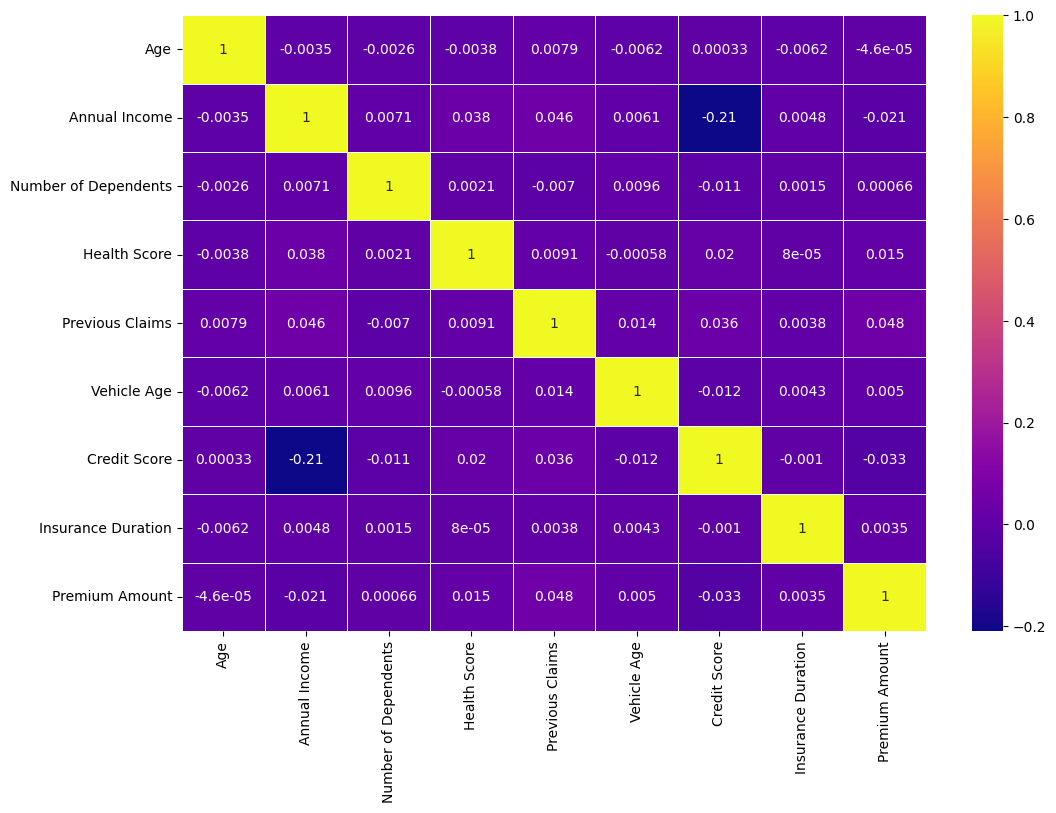

In [21]:
#Visualising variable-target relationships
#variable numerical/variable numerical and target
plt.figure(figsize=(12,8))
sns.heatmap(data=df1_numerical.corr(),annot=True,cmap='plasma',linewidths=0.5)
plt.show()

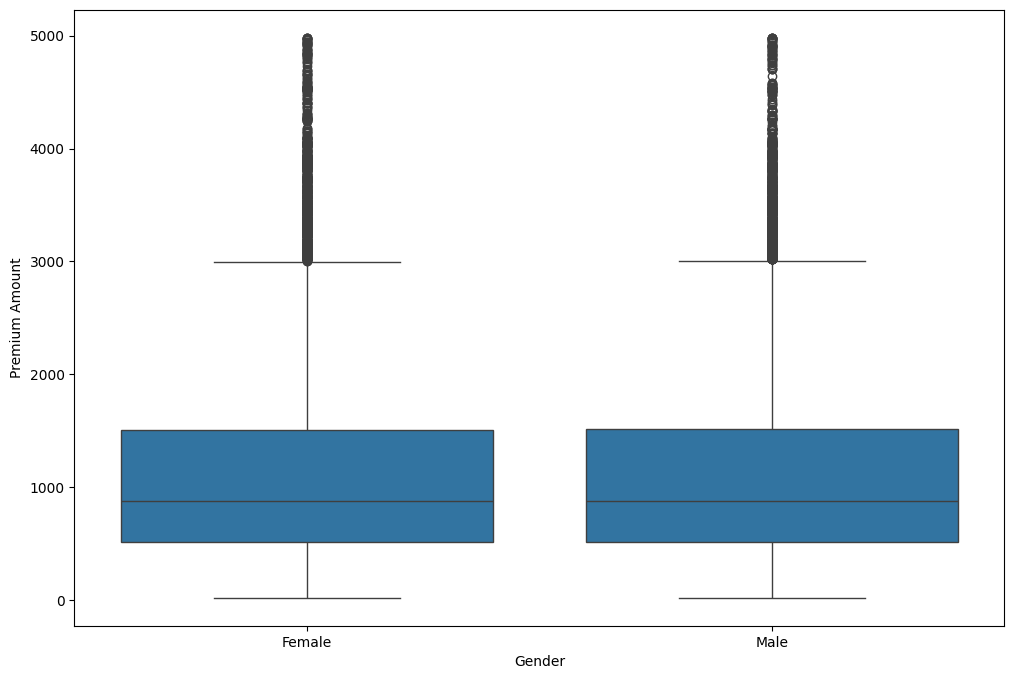

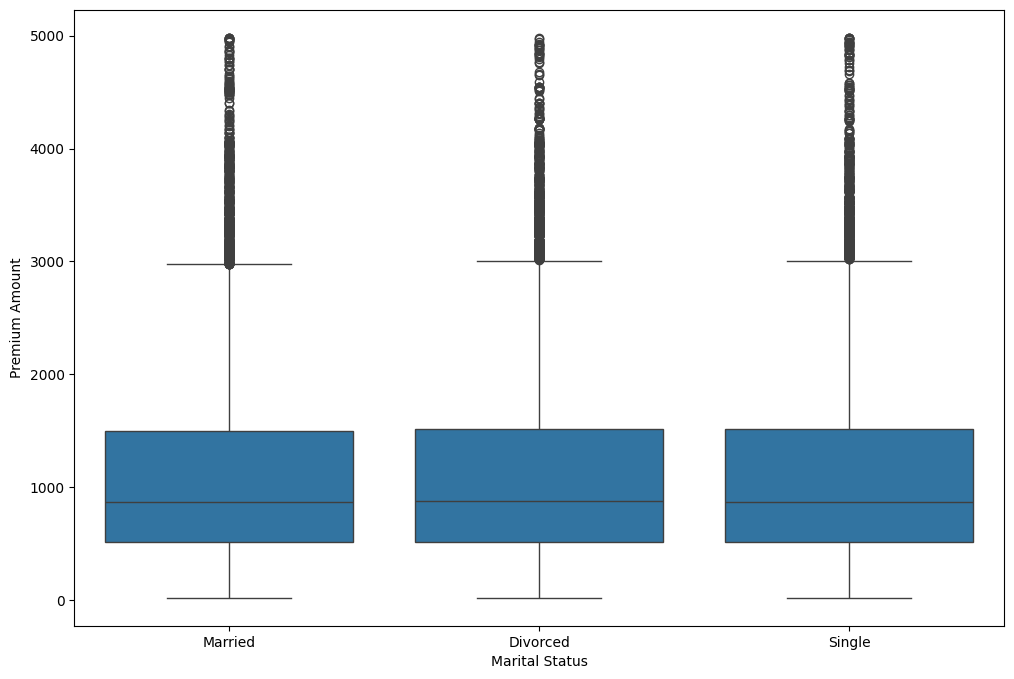

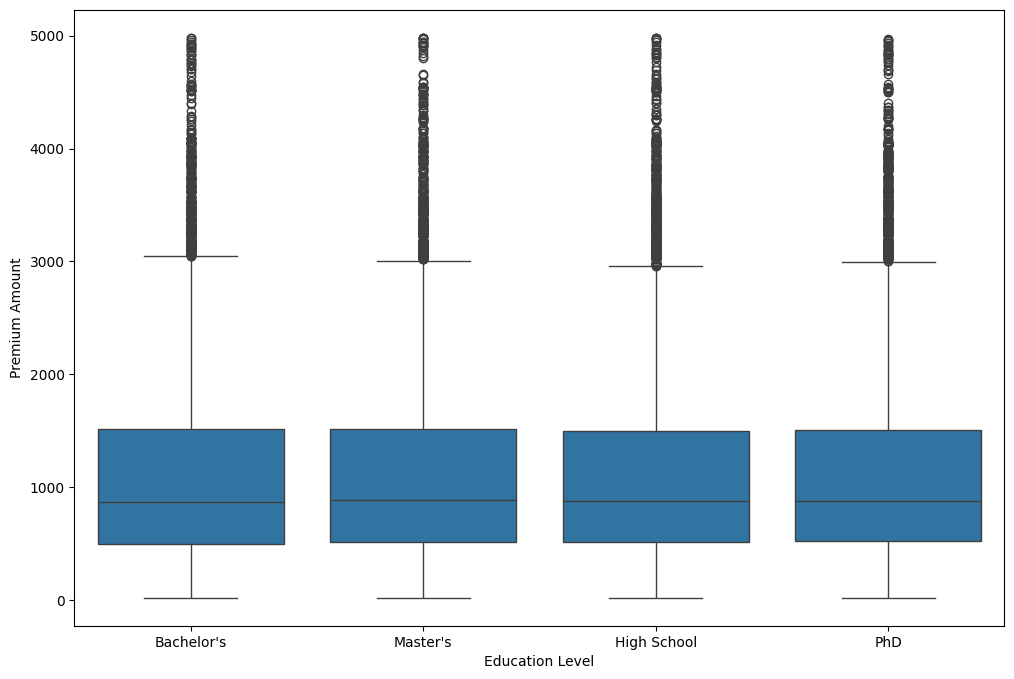

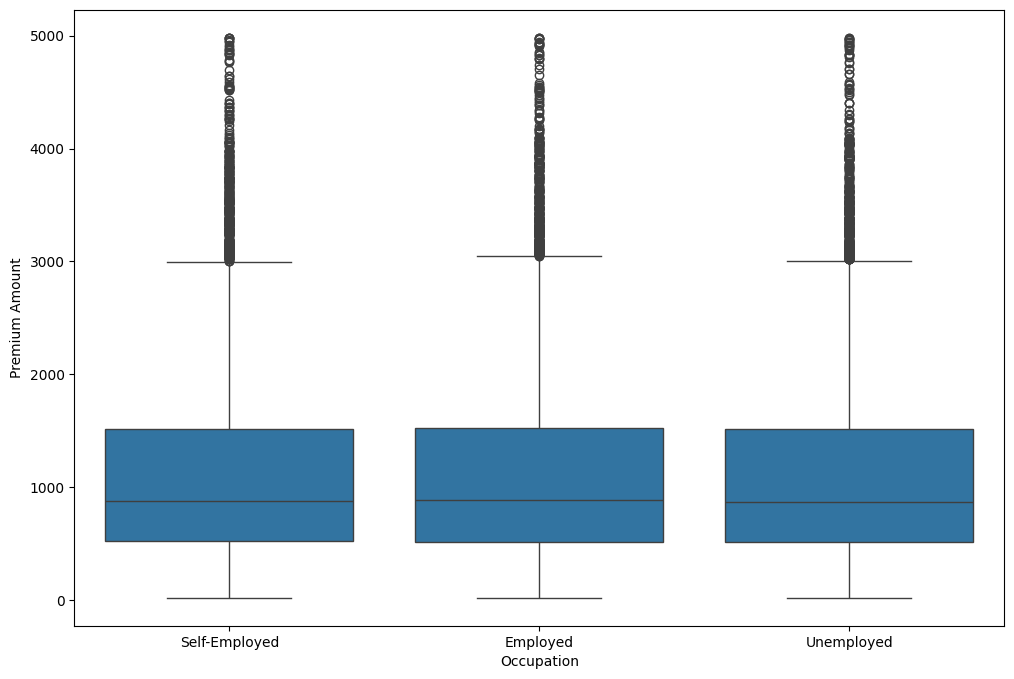

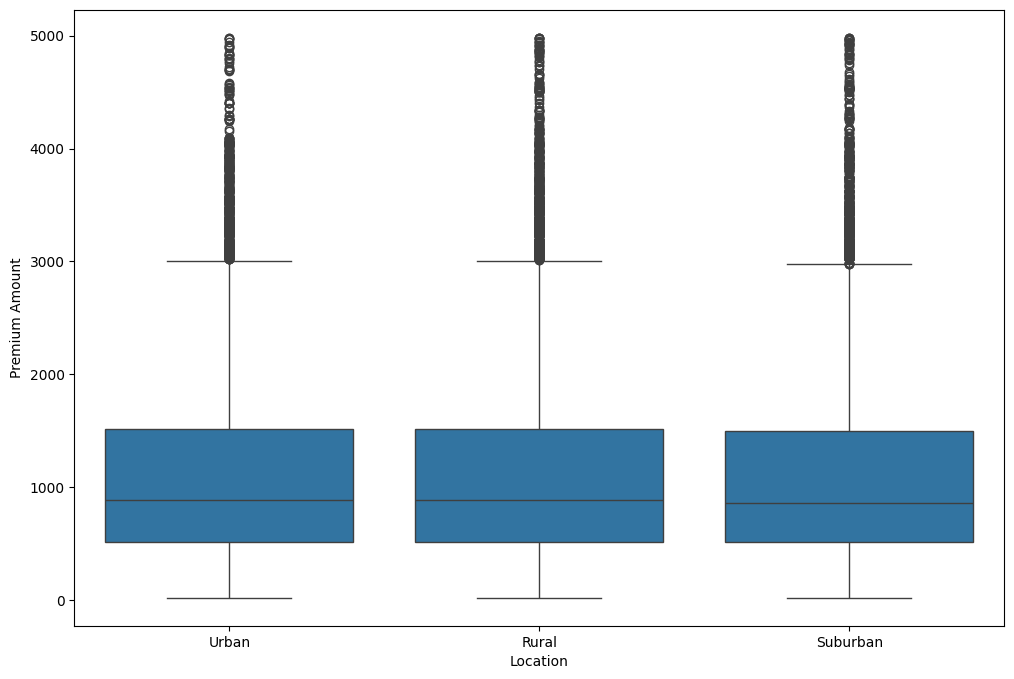

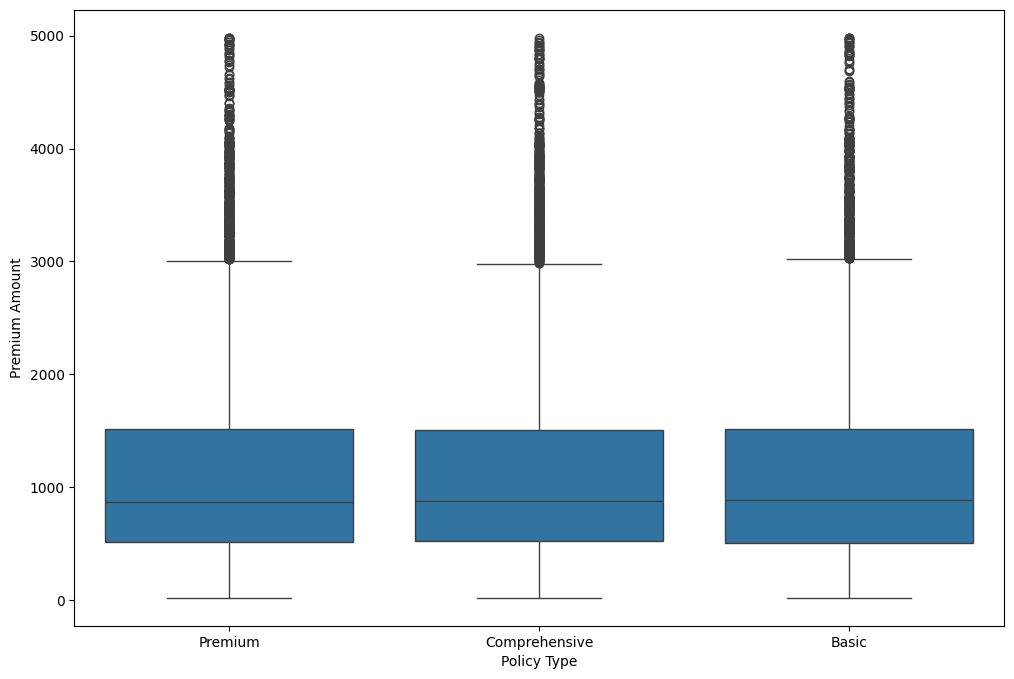

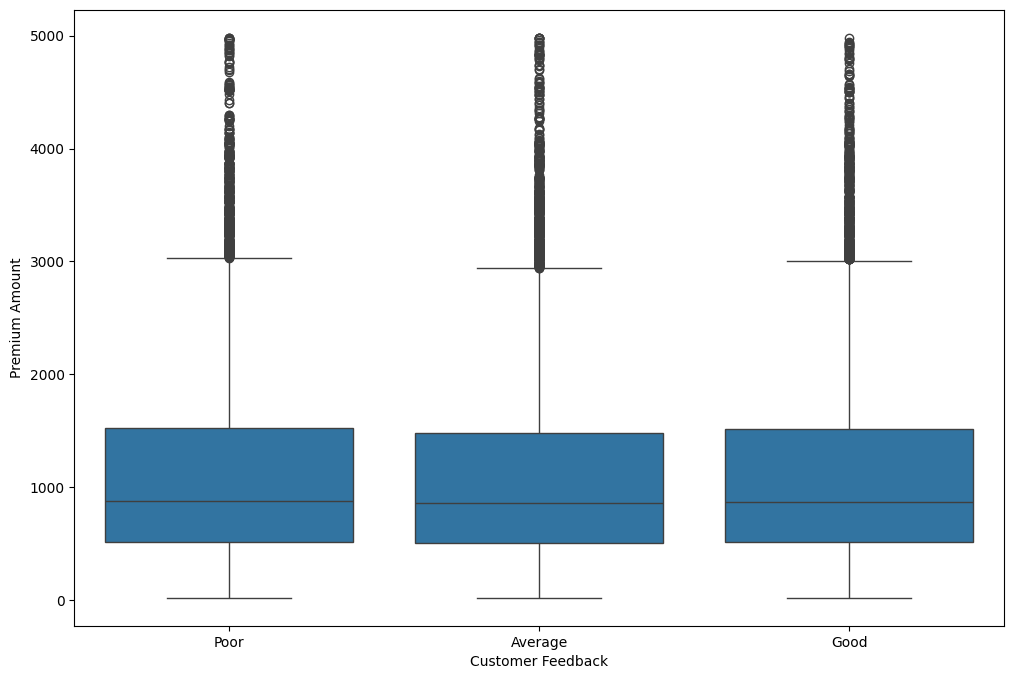

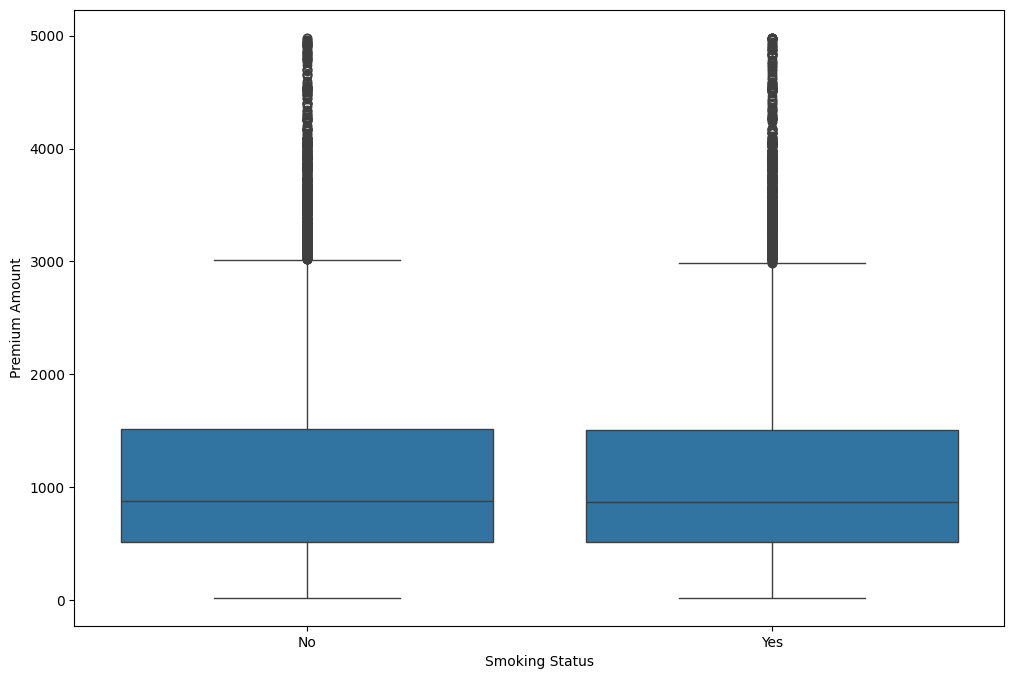

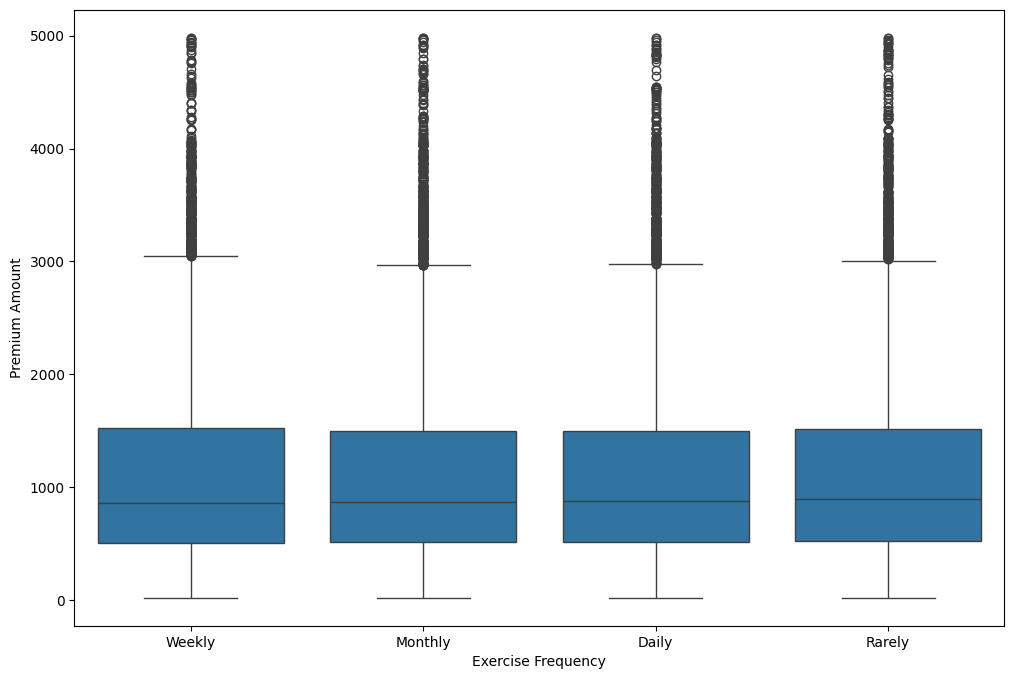

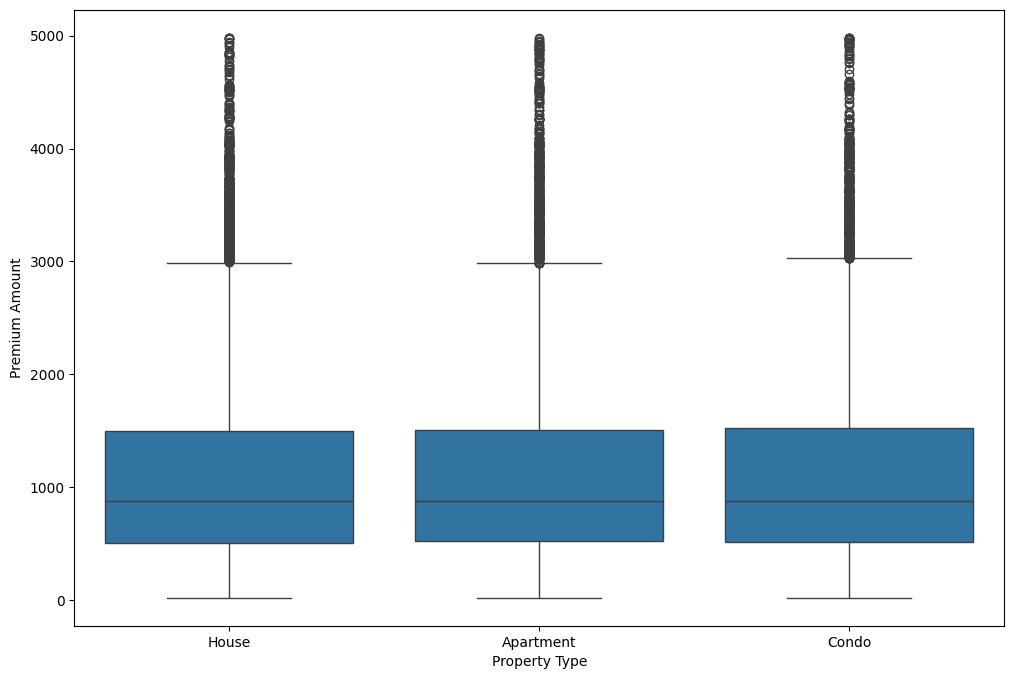

In [28]:
#categorical variable/target
for col in df1_categorical.drop(columns='Policy Start Date'):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df1,x=col,y='Premium Amount')
    plt.show()

#### 3 - Detailed analysis

In [33]:
#Categorical variable/categorical variable
from scipy.stats import chi2_contingency

# Store significant combinations
significant_pairs = []

for col in df1_categorical.drop(columns='Policy Start Date'):
  for col2 in df1_categorical.drop(columns='Policy Start Date'):
    if col != col2:
      crosstab = pd.crosstab(df1[col], df1[col2])
      chi2, p, dof, expected = chi2_contingency(crosstab)
      if p < 0.05:  # Only combinations with p-value < 0.05
        significant_pairs.append((col, col2))

print(significant_pairs)

[('Gender', 'Marital Status'), ('Gender', 'Occupation'), ('Gender', 'Exercise Frequency'), ('Marital Status', 'Gender'), ('Marital Status', 'Smoking Status'), ('Occupation', 'Gender'), ('Occupation', 'Property Type'), ('Smoking Status', 'Marital Status'), ('Exercise Frequency', 'Gender'), ('Property Type', 'Occupation')]


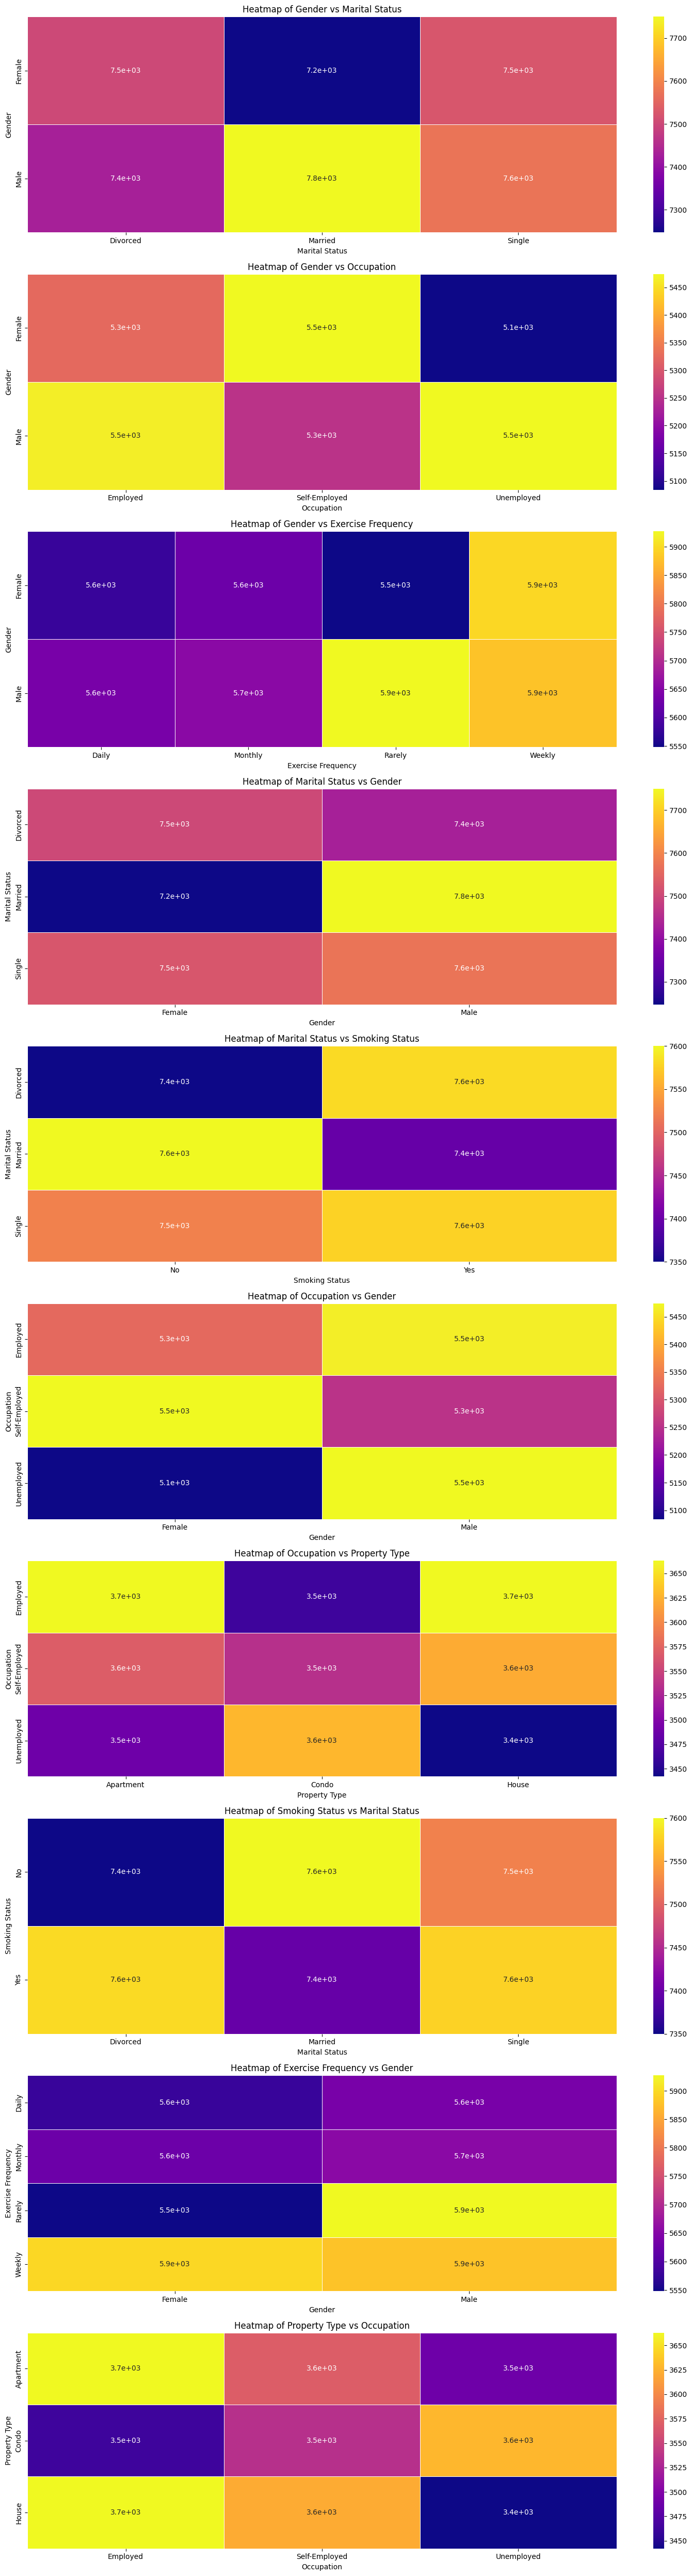

In [32]:
fig, axes = plt.subplots(nrows=len(significant_pairs), figsize=(15, 5 * len(significant_pairs)))

for (col, col2), ax in zip(significant_pairs, axes.flatten()):
    sns.heatmap(data=pd.crosstab(df1[col], df1[col2]), annot=True, cmap='plasma', linewidths=0.5, ax=ax)
    ax.set_title(f'Heatmap of {col} vs {col2}')

plt.tight_layout()
plt.show()

In [35]:
#  NaN analysis
df1_numerical.count()

,0
Age,45046
Annual Income,44009
Number of Dependents,41583
Health Score,42987
Previous Claims,31986
Vehicle Age,45745
Credit Score,40386
Insurance Duration,45746
Premium Amount,45746


In [36]:
df1_categorical.count()

,0
Gender,45746
Marital Status,45029
Education Level,45746
Occupation,32071
Location,45746
Policy Type,45746
Policy Start Date,45746
Customer Feedback,42693
Smoking Status,45746
Exercise Frequency,45746
